In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [66]:
data = pd.read_csv('./Salary_Data.csv')
train_data = pd.read_csv('./Salary_Data.csv', nrows=24) #80% training data => 24 rows

In [61]:
x = np.array(train_data[['YearsExperience']]) #independent variable
y = np.array(train_data[['Salary']]) # dependent variable
n = len(train_data)
test_data = pd.read_csv('./Salary_Data.csv', skiprows=range(1,25))
prec_train_data = copy.deepcopy(train_data)

In [83]:
def gradient_descent(x, y):
    global theta0
    global theta1
    alpha = 0.0001
    for i in range(100000):
        y_est = theta0 + (theta1*x)
        cost = (1/n)*sum((y-y_est)**2)
        theta0 = theta0 - (alpha*(-(2/n)*sum(y-y_est)))
        theta1 = theta1 - (alpha*(-(2/n)*sum(x*(y-y_est))))
    prec_train_data['Salary'] = theta0 + (theta1*prec_train_data['YearsExperience'])

In [84]:
theta0 = -10.8
theta1 = 33.22
gradient_descent(x, y)

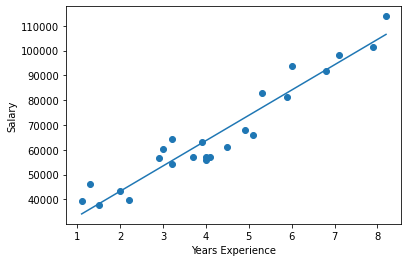

In [85]:
plt.scatter(x, y)
plt.plot(prec_train_data['YearsExperience'], prec_train_data['Salary'])
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

In [74]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [86]:
# linear regression model => salary = theta0 + experience*theta1
# slope
print(f"Slope: {theta1}")
print(f"intercept: {theta0}")

Slope: [10186.11926747]
intercept: [22977.52785562]


In [87]:
prec_test_data = copy.deepcopy(test_data)
prec_test_data['Salary'] = theta0 + theta1*(prec_test_data['YearsExperience'])

In [88]:
error = sum(test_data['Salary']-prec_test_data['Salary'])
error

-35705.63693978997

In [89]:
print(test_data)
print(prec_test_data)

   YearsExperience  Salary
0              8.7  109431
1              9.0  105582
2              9.5  116969
3              9.6  112635
4             10.3  122391
5             10.5  121872
   YearsExperience         Salary
0              8.7  111596.765483
1              9.0  114652.601263
2              9.5  119745.660897
3              9.6  120764.272823
4             10.3  127894.556311
5             10.5  129931.780164
